F24, 94-885 A2, Responsible AI: Principles, Policies, and Practices

(Ungraded Assignment) Week 3 - Explainability and Interpretability: Understanding and Implementing AI Explainability

Ivan Wiryadi (iwiryadi)

---

# Imports and Definitions

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_curve, roc_auc_score

from lime import lime_tabular
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
X, y = fetch_openml("credit-g", version=2, as_frame=True, return_X_y=True)

In [ ]:
y.value_counts()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
category_columns = []
numeric_columns = [] 

for id, type in enumerate(X.dtypes): 
    if type == 'category':
        category_columns.append(X.columns[id])
    else:
        numeric_columns.append(X.columns[id])

In [6]:
# Use OneHotEncoder
ohencoder = OneHotEncoder(sparse_output=False)
ohencoder.fit(X_train[category_columns]) 
c_X_train = X_train.copy().drop(category_columns, axis=1)
c_X_train[ohencoder.get_feature_names_out()] = ohencoder.transform(X_train[category_columns]) 

# Use StandardScaler as specificed in the imports
scaler = StandardScaler()
c_X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns]) 

# Use OHE and StandardScaler for X Test too
c_X_test = X_test.copy().drop(category_columns, axis=1)
c_X_test[ohencoder.get_feature_names_out()] = ohencoder.transform(X_test[category_columns]) 
c_X_test[numeric_columns] = scaler.transform(X_test[numeric_columns]) 

# Use Label Encoder for y
lencoder = LabelEncoder()
c_y_train = lencoder.fit_transform(y_train) 
c_y_test = lencoder.transform(y_test)



In [7]:
# check for label encoder mapping
dict(zip(lencoder.classes_, lencoder.transform(lencoder.classes_)))

{'bad': 0, 'good': 1}

# Modelling

In [36]:
# as specified in the assignment
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)

In [37]:
rf_model.fit(c_X_train, c_y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [38]:
y_hat = rf_model.predict(c_X_test)

In [39]:
print(f1_score(c_y_test, y_hat))
print(recall_score(c_y_test, y_hat))
print(precision_score(c_y_test, y_hat))
print(accuracy_score(c_y_test, y_hat))

0.8571428571428571
0.9787234042553191
0.7624309392265194
0.77


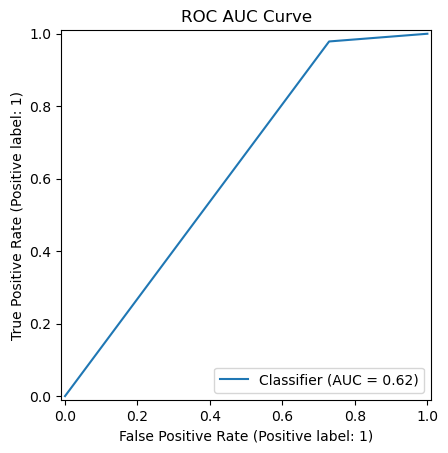

In [41]:
RocCurveDisplay.from_predictions(c_y_test, y_hat)
plt.title("ROC AUC Curve")
plt.show()

In [12]:
print(c_X_train.shape)
print(c_y_test.shape)

(800, 61)
(200,)


In [13]:
c_X_test

duration  credit_amount  installment_commitment  residence_since  \
521 -0.262292      -0.058908               -0.860109        -0.766124   
737 -0.262292       0.351952                0.031196         1.044509   
740  0.246190      -0.357558               -0.860109         0.139192   
660 -0.770774      -0.712486                0.031196         1.044509   
411  1.008913       1.343886                0.031196        -0.766124   
..        ...            ...                     ...              ...   
408  0.246190      -0.043371                0.031196        -0.766124   
332  3.297082       1.397401                0.922500        -0.766124   
208  0.246190       1.107382               -0.860109        -0.766124   
613  0.246190       0.093697               -1.751413         1.044509   
78   2.788600       2.097590               -0.860109        -0.766124   

          age  existing_credits  num_dependents  checking_status_0<=X<200  \
521 -1.013530         -0.710931       -0.409736                       0.0   
737 -0.048994         -0.710931        2.440599                       0.0   
740 -0.312049         -0.710931       -0.409736                       0.0   
660 -1.101215         -0.710931       -0.409736                       0.0   
411 -0.048994          1.017777       -0.409736                       0.0   
..        ...               ...             ...                       ...   
408 -0.838159         -0.710931       -0.409736                       0.0   
332 -1.013530         -0.710931       -0.409736                       1.0   
208 -1.276585         -0.710931       -0.409736                       0.0   
613 -1.188900         -0.710931       -0.409736                       0.0   
78   0.301746         -0.710931        2.440599                       0.0   

     checking_status_<0  checking_status_>=200  ...  housing_own  \
521                 1.0                    0.0  ...          1.0   
737                 1.0                    0.0  ...          1.0   
740                 1.0                    0.0  ...          1.0   
660                 0.0                    1.0  ...          0.0   
411                 0.0                    0.0  ...          1.0   
..                  ...                    ...  ...          ...   
408                 0.0                    0.0  ...          1.0   
332                 0.0                    0.0  ...          1.0   
208                 1.0                    0.0  ...          1.0   
613                 1.0                    0.0  ...          0.0   
78                  0.0                    0.0  ...          1.0   

     housing_rent  job_high qualif/self emp/mgmt  job_skilled  \
521           0.0                            0.0          1.0   
737           0.0                            0.0          0.0   
740           0.0                            0.0          1.0   
660           1.0                            0.0          1.0   
411           0.0                            1.0          0.0   
..            ...                            ...          ...   
408           0.0                            1.0          0.0   
332           0.0                            1.0          0.0   
208           0.0                            0.0          0.0   
613           1.0                            0.0          1.0   
78            0.0                            0.0          0.0   

     job_unemp/unskilled non res  job_unskilled resident  own_telephone_none  \
521                          0.0                     0.0                 1.0   
737                          0.0                     1.0                 0.0   
740                          0.0                     0.0                 1.0   
660                          0.0                     0.0                 1.0   
411                          0.0                     0.0                 0.0   
..                           ...                     ...                 ...   
408                          0.0             

In [14]:
np.where(c_y_test == 0)

(array([  0,  11,  13,  14,  15,  18,  21,  25,  32,  39,  46,  47,  48,
         50,  53,  57,  61,  62,  69,  75,  76,  78,  79,  85,  86,  87,
         92,  98,  99, 101, 102, 109, 110, 116, 117, 124, 125, 126, 131,
        132, 136, 140, 142, 145, 148, 149, 153, 159, 160, 162, 165, 179,
        185, 186, 190, 192, 193, 194, 196]),)

In [15]:
np.where(y_hat == 0)

(array([  2,  11,  13,  14,  39,  46,  50,  57,  58,  86,  87,  92,  98,
        110, 145, 149, 162, 163, 196]),)

In [16]:
print(rf_model.classes_)
pred_proba = rf_model.predict_proba(c_X_test)

# Get sample cases for analysis by choosing highest probabilities
print(f"High Class 1 Sample: {np.argmax(pred_proba[:, 1])} ; High Class 0 Sample: {np.argmax(pred_proba[:, 0])}")
print(f"Borderline Class Sample: {np.argmin(np.abs(pred_proba[:, 0] - pred_proba[:, 1]))}")

[0 1]
High Class 1 Sample: 23 ; High Class 0 Sample: 92
Borderline Class Sample: 149


In [17]:
good_sample = np.argmax(pred_proba[:, 1])
bad_sample = np.argmax(pred_proba[:, 0])
borderline_sample = np.argmin(np.abs(pred_proba[:, 0] - pred_proba[:, 1]))

# Check whether the samples are accurate predictions
print(np.argmax(pred_proba[good_sample]) == c_y_test[good_sample])
print(np.argmax(pred_proba[bad_sample]) == c_y_test[bad_sample])
print(np.argmax(pred_proba[borderline_sample]) == c_y_test[borderline_sample])


True
True
True


In [18]:
# for checking data
idx = 57
c_X_test[idx:idx+1]

duration  credit_amount  installment_commitment  residence_since  \
10 -0.770774      -0.713177                0.031196         -1.67144   

         age  existing_credits  num_dependents  checking_status_0<=X<200  \
10 -0.925844         -0.710931       -0.409736                       1.0   

    checking_status_<0  checking_status_>=200  ...  housing_own  housing_rent  \
10                 0.0                    0.0  ...          0.0           1.0   

    job_high qualif/self emp/mgmt  job_skilled  job_unemp/unskilled non res  \
10                            0.0          1.0                          0.0   

    job_unskilled resident  own_telephone_none  own_telephone_yes  \
10                     0.0                 1.0                0.0   

    foreign_worker_no  foreign_worker_yes  
10                0.0                 1.0  

[1 rows x 61 columns]

# Explainability Implementations

In [19]:
# compute the SHAP values for the model
explainer = shap.TreeExplainer(rf_model)

In [20]:
shap_values = explainer.shap_values(c_X_test)

In [21]:
rf_model.feature_importances_

array([0.08512436, 0.11049574, 0.03090613, 0.0225361 , 0.0863132 ,
       0.01496787, 0.00357018, 0.01875873, 0.07900003, 0.00577034,
       0.10543724, 0.00958346, 0.03049517, 0.00545749, 0.01485426,
       0.01602742, 0.00655157, 0.00036281, 0.0050452 , 0.00897374,
       0.02280821, 0.00065843, 0.01243587, 0.00104585, 0.        ,
       0.00710736, 0.00453329, 0.00286339, 0.02015168, 0.00259609,
       0.01096321, 0.01209304, 0.00746414, 0.0106411 , 0.01281418,
       0.00503114, 0.01161942, 0.00183095, 0.0045763 , 0.01318259,
       0.00186316, 0.00472453, 0.00828811, 0.0129166 , 0.00688649,
       0.01485986, 0.01369693, 0.01264818, 0.01492925, 0.00153331,
       0.0053078 , 0.02057215, 0.00731311, 0.00969393, 0.01016309,
       0.        , 0.00597713, 0.00932411, 0.01197715, 0.00142363,
       0.00125418])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


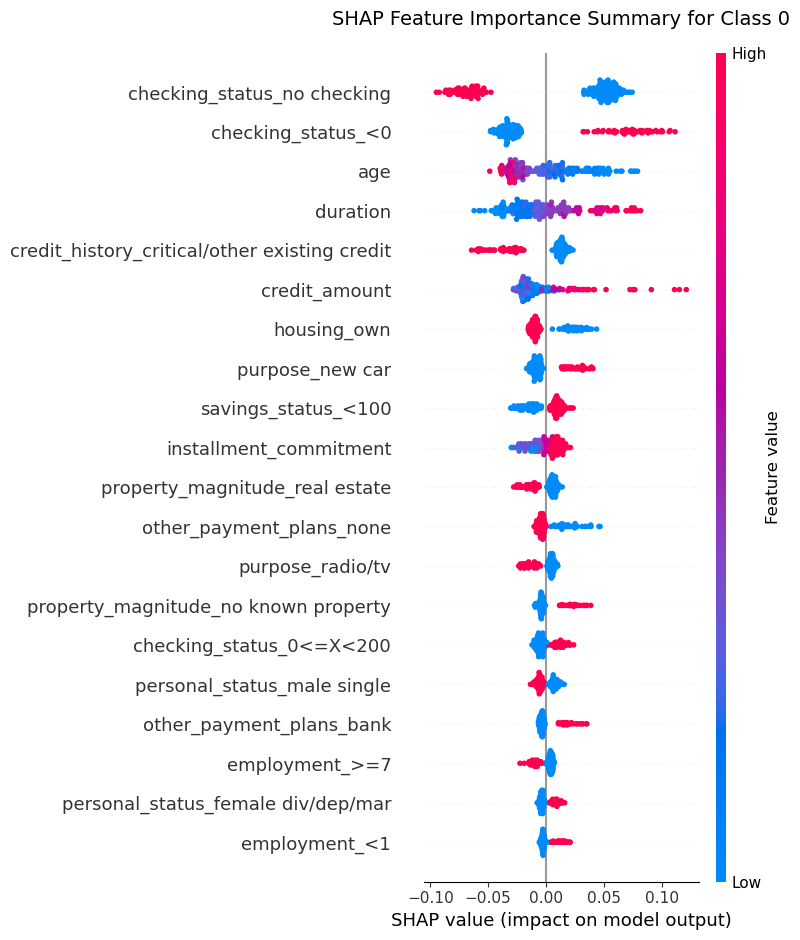

In [22]:
fig_name = "SHAP Feature Importance Summary for Class 0"
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values[0], c_X_test, show=False)
plt.title(fig_name, pad=20, fontsize=14)
plt.tight_layout()
plt.savefig(f"../visualizations/{fig_name}", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


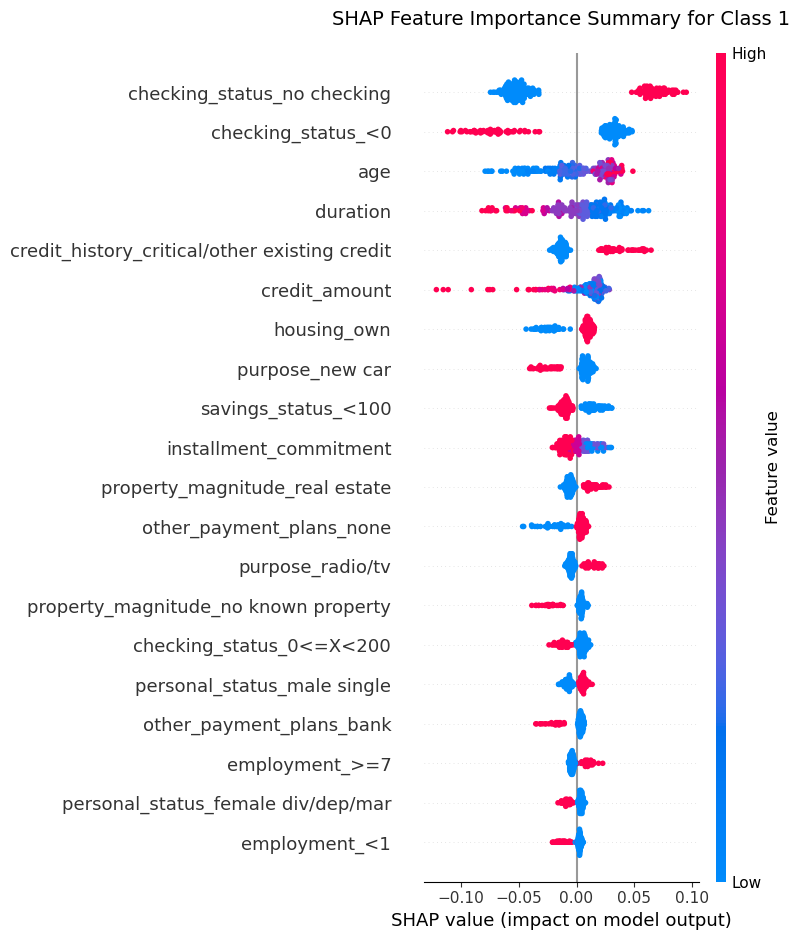

In [23]:
fig_name = "SHAP Feature Importance Summary for Class 1"
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values[1], c_X_test, show=False)
plt.title(fig_name, pad=20, fontsize=14)
plt.tight_layout()
plt.savefig(f"../visualizations/{fig_name}", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [24]:
explain_samples = {
    (good_sample, 0), 
    (good_sample, 1),
    (bad_sample, 0),
    (bad_sample, 1), 
    (borderline_sample, 0),
    (borderline_sample, 1),
}


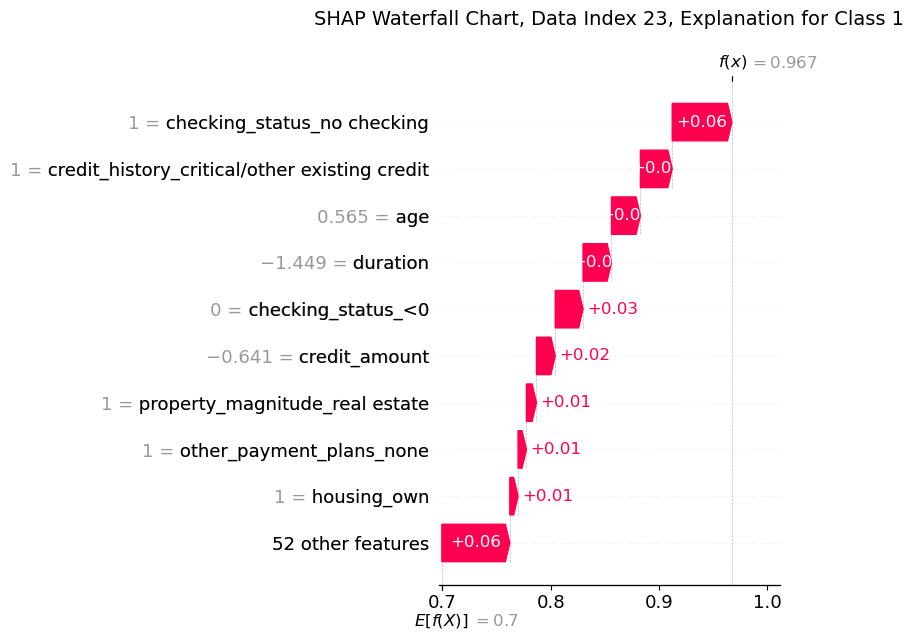

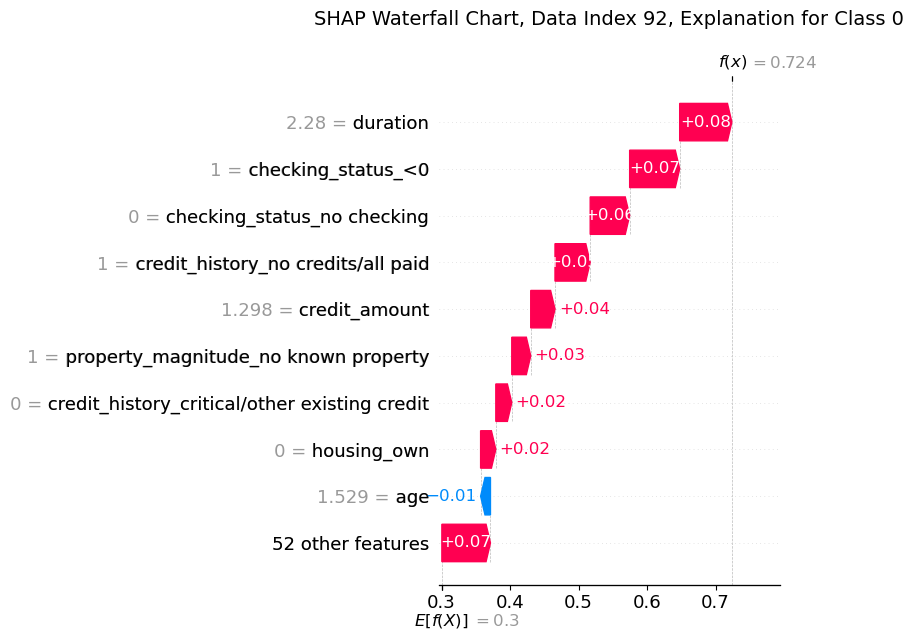

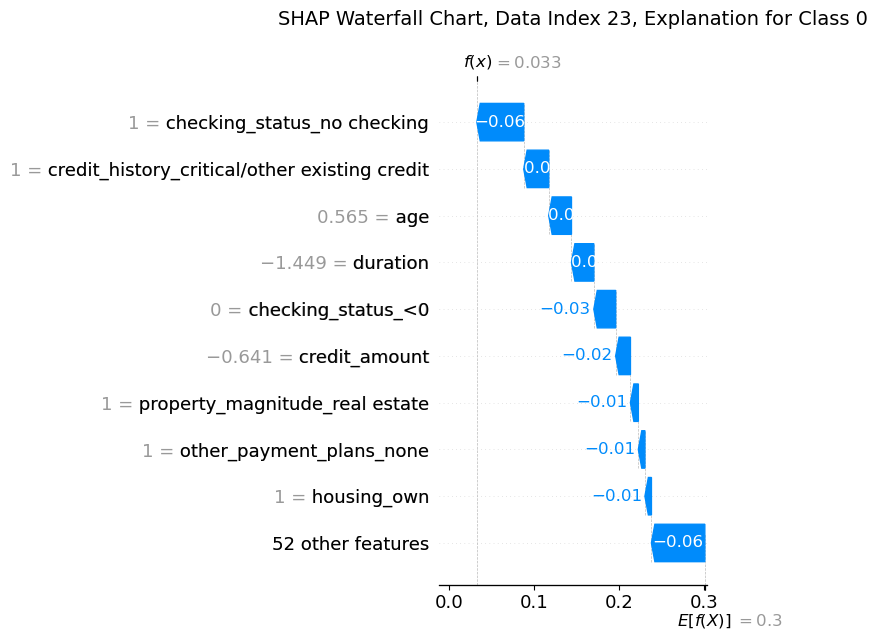

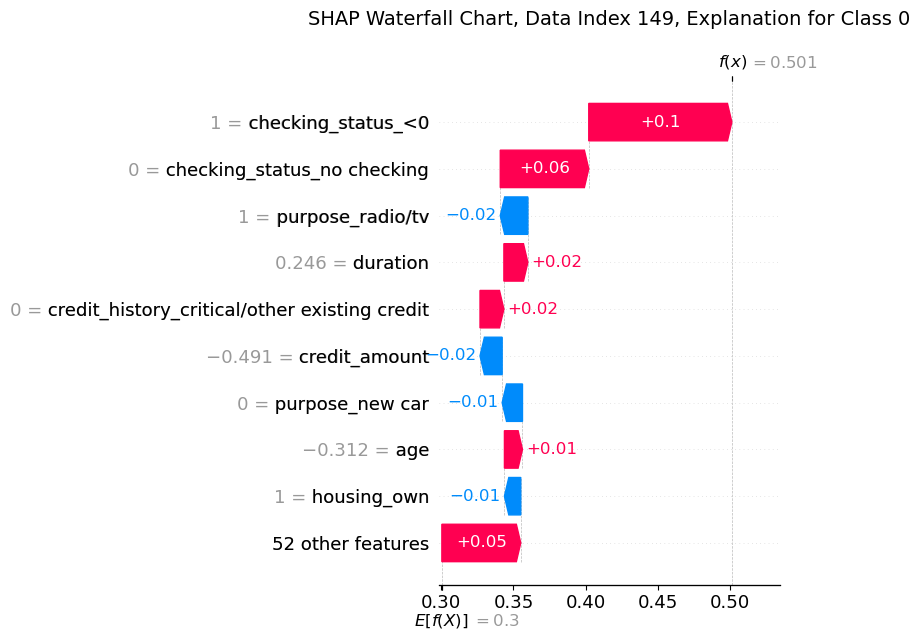

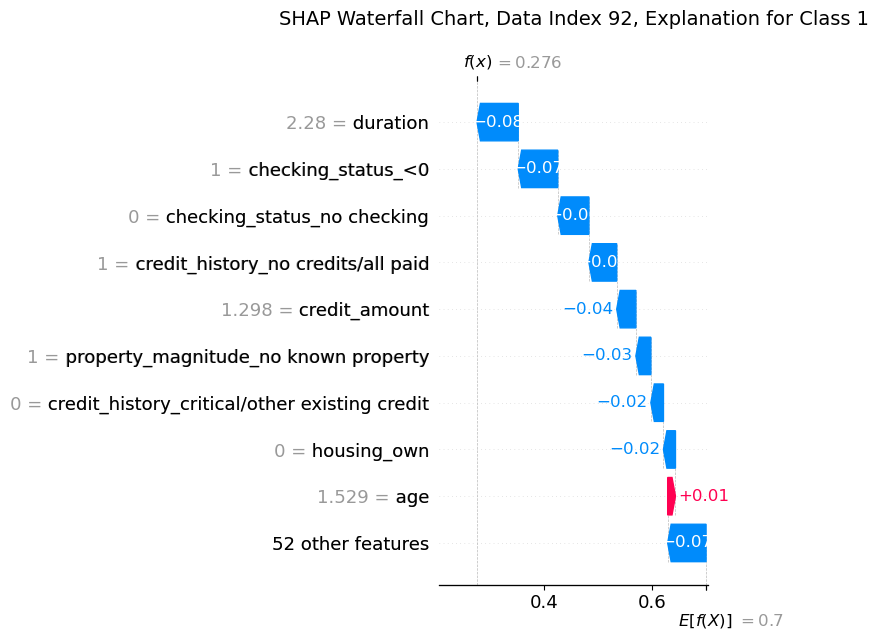

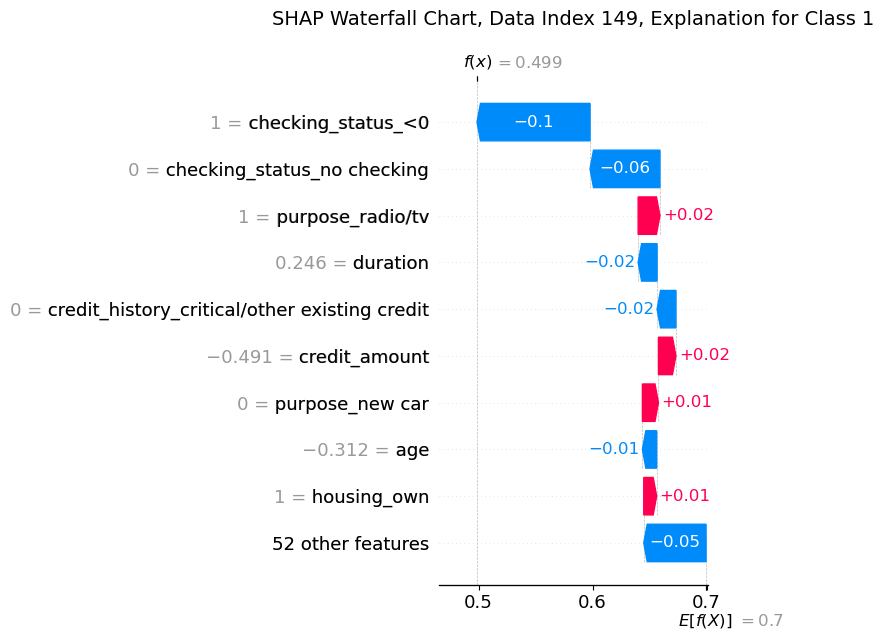

In [25]:
for data_idx, data_class in explain_samples:
    fig_name = f"SHAP Waterfall Chart, Data Index {data_idx}, Explanation for Class {data_class}"
    plt.figure(figsize=(10, 10))

    explanation = shap.Explanation(
            values=shap_values[data_class][data_idx], 
            base_values=explainer.expected_value[data_class],
            data=c_X_test.iloc[data_idx],  
            feature_names=c_X_test.columns
        )

    shap.waterfall_plot(explanation, show=False)

    plt.title(fig_name, pad=20, fontsize=14)
    plt.tight_layout()
    plt.savefig(f"../visualizations/{fig_name}", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [26]:
# Initialize LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=c_X_train.values,     # Training data
    feature_names=c_X_train.columns,    # Feature names
    class_names=['Class 0', 'Class 1'],  # Class names for binary classification
    mode='classification',              # For classification tasks
    discretize_continuous=True          # Discretize continuous features
)

for instance_idx in {i for i, x in explain_samples}:
    # Explain a single prediction

    exp = lime_explainer.explain_instance(
        c_X_test.iloc[instance_idx].values,    # Instance to explain
        rf_model.predict_proba,         # Prediction function
        num_features=15                 # Number of features to show
    )

    # Visualize the explanation
    exp.show_in_notebook()              # For Jupyter notebooks
    exp.save_to_file(f'../visualizations/LIME Visualization Data Index {instance_idx}.html')

    # Get feature importance as a list
    feature_importance = exp.as_list()

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
